In [35]:
# check the main file for making random clusters (blobs) (what is the point?!)

In [36]:
# Customer segmentation
# into groups of individuals that have similar characteristics
# eg to detect profitable vs non profitable costumers

import pandas as pd
from urllib.request import urlretrieve

url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%204/data/Cust_Segmentation.csv"
out_file = "Cust_Segmentation.csv"

urlretrieve(url, out_file)

df = pd.read_csv(out_file)
df = df.drop('Address', axis=1)
df.head()

,Customer Id,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio
0,1,41,2,6,19,0.124,1.073,0.0,6.3
1,2,47,1,26,100,4.582,8.218,0.0,12.8
2,3,33,2,10,57,6.111,5.802,1.0,20.9
3,4,29,2,4,19,0.681,0.516,0.0,6.3
4,5,47,1,31,253,9.308,8.908,0.0,7.2


In [37]:
#* K-means clustering is an unsupervised learning algorithm, meaning we don't have a target variable (y)
X = df.iloc[:, 1:].values  # to exclude the "Customer ID column"
# or: X = df.values[:,1:]

import numpy as np
X = np.nan_to_num(X)
# nan_to_num(X):
# Converts NaN (Not a Number) → 0
# Converts positive infinity → largest finite number
# Converts negative infinity → smallest finite number

# we should standardize X in k Mean Clustering
from sklearn.preprocessing import StandardScaler
X = StandardScaler().fit_transform(X)


In [38]:
# for choosing the k number, we can try practically common values like 3-5 (e.g., low/medium/high value customers)
# we can also do Elbow Method
from sklearn.cluster import KMeans

model_kMean = KMeans(init='k-means++', n_clusters=3, n_init=12).fit(X)  # in the main file it didn't use standardized X to fit!
# init: specifies how the initial centroids are chosen
# k-means++: First centroid is chosen randomly
# n_init=12: n_init=12 specifies how many times the k-means algorithm will run with different centroid seeds
# for n_init:
# < 10,000 rows: 15-20
# 10,000 - 100,000 rows: 8-12
# 100,000 - 1,000,000 rows: 3-7
# > 1,000,000 rows: 1-3

df['Clus_km'] = model_kMean.labels_  # says each row is in which cluster
df.head()

,Customer Id,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio,Clus_km
0,1,41,2,6,19,0.124,1.073,0.0,6.3,0
1,2,47,1,26,100,4.582,8.218,0.0,12.8,2
2,3,33,2,10,57,6.111,5.802,1.0,20.9,1
3,4,29,2,4,19,0.681,0.516,0.0,6.3,0
4,5,47,1,31,253,9.308,8.908,0.0,7.2,2


In [39]:
# check the centroid values in each cluster
df.groupby('Clus_km').mean()

,Customer Id,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio
Clus_km,,,,,,,,,
0,426.122905,33.817505,1.603352,7.625698,36.143389,0.853128,1.816855,0.000000,7.964991
1,424.451807,31.891566,1.861446,3.963855,31.789157,1.576675,2.843355,0.993939,13.994578
2,424.408163,43.000000,1.931973,17.197279,101.959184,4.220673,7.954483,0.162393,13.915646


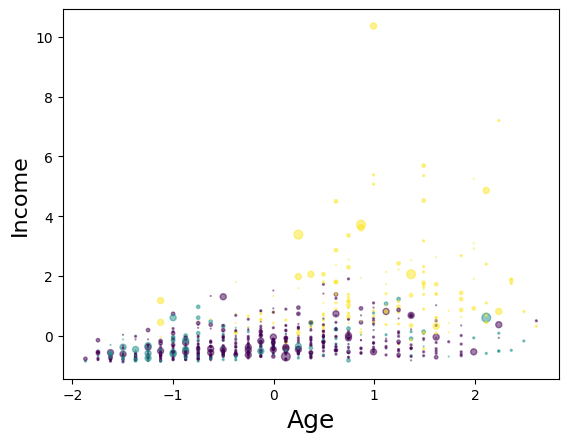

In [48]:
import matplotlib.pyplot as plt

area = np.pi * (X[:, 1])**2  # create circles with rs equal to the value of each row
plt.scatter(X[:, 0], X[:, 3], s=area, c=df['Clus_km'].astype(float), alpha=0.5)
plt.xlabel('Age', fontsize=18)
plt.ylabel('Income', fontsize=16)
plt.show()


In [ ]:
# last plot in the main file?